In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import scipy.ndimage

In [2]:
def reshape_images(images):
    train_im = [] 
    for i in range(images.shape[0]):
        train_im.append(torch.Tensor(images[i][1].reshape((1,100,100)).copy()) / 255.)
    return train_im

In [3]:
def augment_data(images, labels):
    augmented_images = []
    augmented_labels = []
    for i in range(images.shape[0]):
        image = images[i][1].reshape(100,100)
        augmented_images.append(6*i)
        augmented_images.append(image)
        augmented_images.append(6*i+1)
        augmented_images.append(np.flip(image, axis = 0))
        augmented_images.append(6*i+2)
        augmented_images.append(np.flip(image, axis = 1))
        augmented_images.append(6*i+3)
        augmented_images.append(np.transpose(image))
        augmented_images.append(6*i+4)
        augmented_images.append(scipy.ndimage.rotate(image, angle=3, reshape = False))
        augmented_images.append(6*i+5)
        augmented_images.append(scipy.ndimage.rotate(image, angle=-3, reshape = False))
        augmented_labels.append((6*i  , labels[i][1]))
        augmented_labels.append((6*i+1, labels[i][1]))
        augmented_labels.append((6*i+2, labels[i][1]))
        augmented_labels.append((6*i+3, labels[i][1]))
        augmented_labels.append((6*i+4, labels[i][1]))
        augmented_labels.append((6*i+5, labels[i][1]))
    return np.array(augmented_images, dtype = object).reshape(-1, 2), np.array(augmented_labels, dtype = object)

In [4]:
def shuffle_data(images, labels):
    rng_state = np.random.get_state()
    np.random.shuffle(images[:,1])
    np.random.set_state(rng_state)
    np.random.shuffle(labels[:,1])

In [5]:
train_labels = np.genfromtxt('train_labels.csv',names=True, delimiter=',', dtype=[('Id', 'i8'), ('Category', 'S5')])
images_train = np.load('train_images.npy',encoding='latin1')

augmented_images, augmented_labels = augment_data(images_train, train_labels)

In [6]:
print(augmented_labels)

[[0 b'shove']
 [1 b'shove']
 [2 b'shove']
 ...
 [59997 b'penci']
 [59998 b'penci']
 [59999 b'penci']]


In [7]:
shuffle_data(augmented_images, augmented_labels)

In [8]:
print(augmented_labels)

[[0 b'pool']
 [1 b'nail']
 [2 b'pear']
 ...
 [59997 b'rhino']
 [59998 b'skate']
 [59999 b'panda']]


b'scorp'


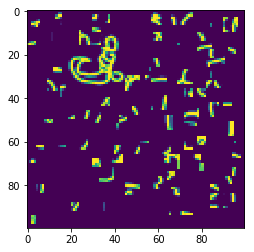

In [12]:
print(augmented_labels[300][1])
plt.imshow(augmented_images[300][1])